In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Loading data 
x=pd.read_csv('DATASET/Linear_X_Train.csv')
y=pd.read_csv('DATASET/Linear_Y_Train.csv')
X_train=x.values
Y_train=y.values
X_train=X_train.reshape((X_train.shape[0],))
Y_train=Y_train.reshape((Y_train.shape[0],))
print(X_train.shape)
print(Y_train.shape)

(3750,)
(3750,)


[]

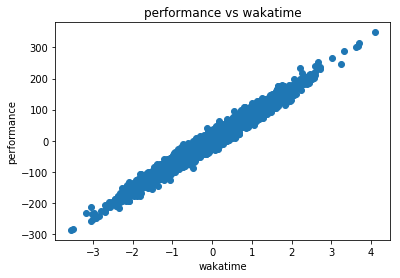

In [14]:
# visulising data
plt.scatter(X_train,Y_train)
plt.xlabel('wakatime')
plt.ylabel('performance')
plt.title('performance vs wakatime')
plt.plot()

In [61]:
#  hypothesis
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

# error 
def error(X,Y,theta):
    m=X.shape[0]
    error=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    return error

# gradient calculation
def grad(X,Y,theta):
    gra=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        gra[0]+=(hx-Y[i])
        gra[1]+=(hx-Y[i])*X[i]
    return gra    

# gradient descent
def gradient_descent(X,Y,learning_rate=0.00001):
    theta=np.zeros((2,))
    max_iteration=20000
    erro=[]
    i=0
    while i < max_iteration:
        err=error(X,Y,theta)
        erro.append(err)
        gra=grad(X,Y,theta)
        theta[0]=theta[0]-learning_rate*gra[0]
        theta[1]=theta[1]-learning_rate*gra[1]
        
        i+=1
    return erro,theta

error,theta=gradient_descent(X_train,Y_train)

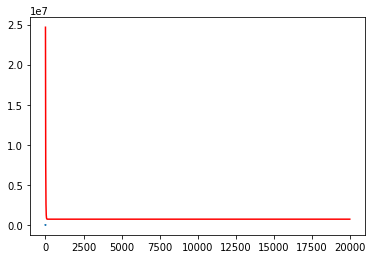

In [62]:
plt.plot(X_train,hypothesis(X_train,theta))
plt.plot(error,color='red')
plt.show()

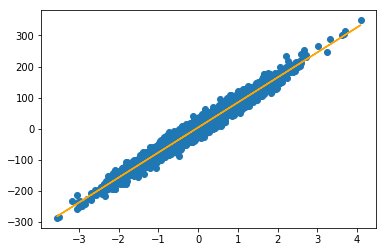

In [63]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,hypothesis(X_train,theta),color='orange')
plt.show()

In [64]:
x=pd.read_csv('DATASET/Linear_X_Test.csv').values
X_test=x.reshape((x.shape[0],))

In [65]:
Y_test=hypothesis(X_test,theta)
print(Y_test.shape)

(1250,)


In [67]:
df=pd.DataFrame(Y_test)
df.to_csv('DATASET/Linear_Y_Test.csv',index=False,header=['Y'])